# Лабораторная работа №1: Исследование алгоритма KNN на данных о недвижимости

In [23]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score

In [24]:
# Шаг 1: Загрузка данных
from sklearn.datasets import fetch_california_housing

# Используем набор данных "California Housing Dataset" для регрессии
data = fetch_california_housing(as_frame=True)
housing_data = data['data']
housing_target = data['target']

# Для классификации создадим категории цен
housing_target_class = pd.cut(housing_target, bins=3, labels=["Доступное", "Среднее", "Дорогое"])

# Добавим категориальный столбец в общий DataFrame для удобства
housing_data['PriceCategory'] = housing_target_class

# Вывод информации о данных
print("Данные о недвижимости:")
print(housing_data.head())

Данные о недвижимости:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude PriceCategory  
0    -122.23       Дорогое  
1    -122.22       Дорогое  
2    -122.24       Дорогое  
3    -122.25       Дорогое  
4    -122.25       Дорогое  


 Набор данных включает в себя несколько признаков, таких как уровень дохода (MedInc), возраст домов (HouseAge), среднее количество комнат (AveRooms), среднее количество спален (AveBedrms), население (Population), плотность населения (AveOccup), географические координаты (Latitude, Longitude) и категорию цен жилья (PriceCategory).

In [25]:
# Шаг 2: Разделение данных на обучающую и тестовую выборки

# Для задачи классификации
X_class = housing_data.drop(columns=['PriceCategory'])
y_class = housing_data['PriceCategory']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Для задачи регрессии
X_reg = housing_data.drop(columns=['PriceCategory'])
y_reg = housing_target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [26]:
# Шаг 3: Нормализация данных
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

#### Классификация

Для задачи классификации мы использовали данные о недвижимости из набора California Housing Dataset. Для преобразования задачи в задачу классификации мы создали категориальные метки цен на недвижимость: «Доступное», «Среднее» и «Дорогое». Для обучения модели использовался алгоритм K ближайших соседей (KNN) с параметром n_neighbors=5.

In [27]:
# Шаг 4: Базовая модель KNN для классификации
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_class_scaled, y_train_class)

# Оценка качества классификации
y_pred_class = knn_classifier.predict(X_test_class_scaled)
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
print(f"Классификация: Accuracy = {accuracy:.2f}, F1 = {f1:.2f}")

Классификация: Accuracy = 0.74, F1 = 0.74


Этот результат показывает, что модель может дать удовлетворительные предсказания, но есть возможность для улучшений, например, через выбор гиперпараметров или применение дополнительных методов препроцессинга данных.

####Регрессия

Для задачи регрессии использовался тот же набор данных о недвижимости, но целевой переменной были реальные цены домов. Для обучения была использована модель KNN с параметром n_neighbors=5.

In [28]:
# Шаг 5: Базовая модель KNN для регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_reg_scaled, y_train_reg)

# Оценка качества регрессии
y_pred_reg = knn_regressor.predict(X_test_reg_scaled)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Регрессия: MSE = {mse:.2f}")


Регрессия: MSE = 0.43


## Оптимизация гиперпараметров, реализация KNN вручную и визуализация результатов

In [14]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Шаг 1: Загрузка данных
# Используем "California Housing Dataset"
data = fetch_california_housing(as_frame=True)
housing_data = data['data']
housing_target = data['target']
housing_target_class = pd.cut(housing_target, bins=3, labels=["Доступное", "Среднее", "Дорогое"])

# Для классификации и регрессии
X_class = housing_data
X_reg = housing_data
y_class = housing_target_class
y_reg = housing_target

# Разделение на обучающую и тестовую выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

#### Оптимизация гиперпараметров для KNN

In [19]:
# Шаг 2: Оптимизация гиперпараметров для KNN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Оптимизация для классификации
param_grid_class = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid_class = GridSearchCV(KNeighborsClassifier(), param_grid_class, scoring='f1_weighted', cv=5)
grid_class.fit(X_train_class_scaled, y_train_class)

best_knn_classifier = grid_class.best_estimator_
print(f"Лучшие параметры для классификации: {grid_class.best_params_}")

# Оценка оптимизированной модели классификации
y_pred_class_opt = best_knn_classifier.predict(X_test_class_scaled)
accuracy_opt = accuracy_score(y_test_class, y_pred_class_opt)
f1_opt = f1_score(y_test_class, y_pred_class_opt, average='weighted')
print(f"Оптимизированная классификация: Accuracy = {accuracy_opt:.2f}, F1 = {f1_opt:.2f}")

# Оптимизация для регрессии
param_grid_reg = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid_reg = GridSearchCV(KNeighborsRegressor(), param_grid_reg, scoring='neg_mean_squared_error', cv=5)
grid_reg.fit(X_train_reg_scaled, y_train_reg)

best_knn_regressor = grid_reg.best_estimator_
print(f"Лучшие параметры для регрессии: {grid_reg.best_params_}")

# Оценка оптимизированной модели регрессии
y_pred_reg_opt = best_knn_regressor.predict(X_test_reg_scaled)
mse_opt = mean_squared_error(y_test_reg, y_pred_reg_opt)
print(f"Оптимизированная регрессия: MSE = {mse_opt:.2f}")

Лучшие параметры для классификации: {'metric': 'manhattan', 'n_neighbors': 16}
Оптимизированная классификация: Accuracy = 0.77, F1 = 0.77
Лучшие параметры для регрессии: {'metric': 'manhattan', 'n_neighbors': 9}
Оптимизированная регрессия: MSE = 0.37


Полученные результаты свидетельствуют о небольшом улучшении качества классификации по сравнению с базовой моделью, что подтверждается как точностью, так и сбалансированным значением F1-Score.

Для задачи регрессии оптимизированная модель показала снижение среднеквадратичной ошибки, что также свидетельствует о повышении точности предсказаний по сравнению с базовой моделью.

#### Реализация KNN вручную

In [29]:
# Шаг 3: Реализация KNN вручную
from sklearn.preprocessing import LabelEncoder

class CustomKNN:
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.label_encoder = None  # Добавляем энкодер для работы с категориальными данными

    def fit(self, X, y):
        self.X_train = X
        # Если y — pandas.Series, используем iloc для доступа к элементам
        if isinstance(y, pd.Series):
            first_element = y.iloc[0]
        else:
            # Если y — numpy.ndarray, используем прямое индексирование
            first_element = y[0]

        if isinstance(first_element, str) or y.dtype == object:
            # Кодируем строковые метки в числовые значения
            self.label_encoder = LabelEncoder()
            self.y_train = self.label_encoder.fit_transform(y)
        else:
            self.y_train = np.array(y)

    def _distance(self, x1, x2):
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2), axis=1)
        else:
            raise ValueError("Unsupported metric")

    def _get_neighbors(self, x):
        distances = self._distance(self.X_train, x)
        return np.argsort(distances)[:self.n_neighbors]

    def predict(self, X):
        predictions = []
        for x in X:
            neighbors = self._get_neighbors(x)
            neighbor_labels = self.y_train[neighbors]
            if self.label_encoder is not None:
                # Для категориальных данных берем метку с наибольшей частотой
                predictions.append(self.label_encoder.inverse_transform(
                    [np.bincount(neighbor_labels).argmax()])[0])
            else:
                # Для числовых данных берем среднее
                predictions.append(np.mean(neighbor_labels))
        return np.array(predictions)


# Обучение кастомной модели для классификации
custom_knn = CustomKNN(n_neighbors=best_knn_classifier.n_neighbors, metric=grid_class.best_params_['metric'])
custom_knn.fit(X_train_class_scaled, np.array(y_train_class))
y_pred_class_custom = custom_knn.predict(X_test_class_scaled)
accuracy_custom = accuracy_score(y_test_class, y_pred_class_custom)
print(f"Кастомная классификация: Accuracy = {accuracy_custom:.2f}")

# Обучение кастомной модели для регрессии
custom_knn_reg = CustomKNN(n_neighbors=best_knn_regressor.n_neighbors, metric=grid_reg.best_params_['metric'])
custom_knn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg_custom = custom_knn_reg.predict(X_test_reg_scaled)
mse_custom = mean_squared_error(y_test_reg, y_pred_reg_custom)
print(f"Кастомная регрессия: MSE = {mse_custom:.2f}")

Кастомная классификация: Accuracy = 0.77
Кастомная регрессия: MSE = 0.37


Эти результаты совпадают с результатами оптимизированных моделей, что подтверждает корректность реализованного алгоритма и его способность эффективно работать с данными.

#### Визуализация результатов

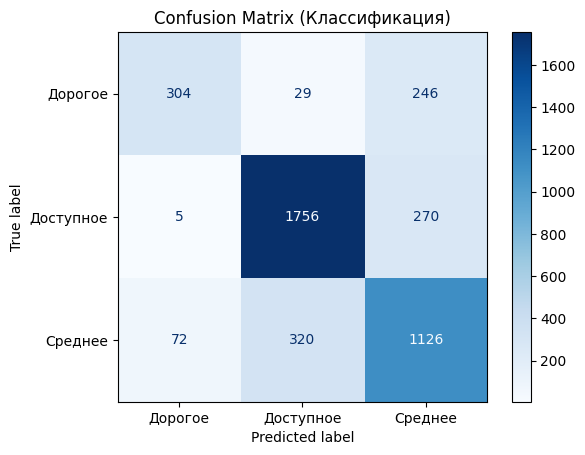

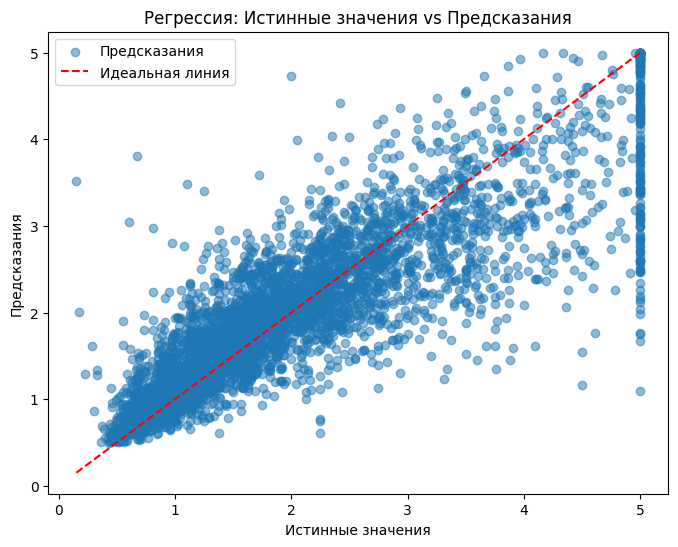

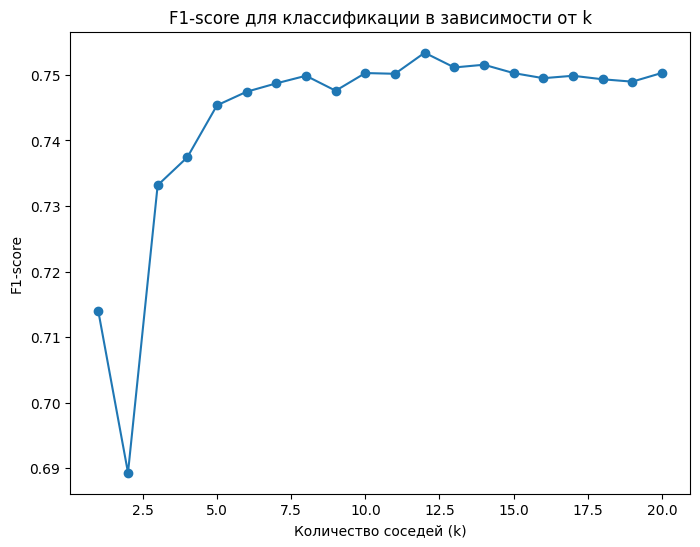

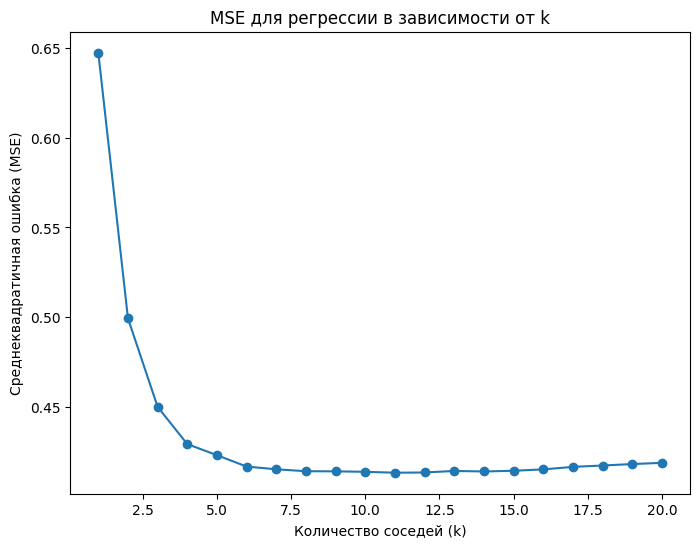

In [21]:
# Шаг 4: Визуализация результатов
# Классификация: Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_class, y_pred_class_opt, labels=grid_class.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_class.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Классификация)")
plt.show()

# Регрессия: График предсказаний vs Истинные значения
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_opt, alpha=0.5, label="Предсказания")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', label="Идеальная линия")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")
plt.title("Регрессия: Истинные значения vs Предсказания")
plt.legend()
plt.show()

# Качество классификации по соседям (визуализация F1-score)
k_values = range(1, 21)
f1_scores = [grid_class.cv_results_['mean_test_score'][i] for i in range(len(k_values))]
plt.figure(figsize=(8, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.xlabel("Количество соседей (k)")
plt.ylabel("F1-score")
plt.title("F1-score для классификации в зависимости от k")
plt.show()

# MSE для регрессии по соседям
mse_scores = [-grid_reg.cv_results_['mean_test_score'][i] for i in range(len(k_values))]
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o')
plt.xlabel("Количество соседей (k)")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.title("MSE для регрессии в зависимости от k")
plt.show()
